# Thư viện và path data

In [11]:
import pickle 
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

sheet_csv = r"data/df_merged.csv"
sheet_txt = r"data/df_merged.txt"
pkl_path = r"data/df_merged.pkl"
new_pkl_path = r"data/new_df_merged.pkl"
sheet_csv_clean = r"data/df_merged_clean.csv"

In [26]:
df = pd.read_pickle(pkl_path)
df_final = pd.DataFrame()
for item in df:
    df_final= pd.concat([df_final, item], ignore_index = True)
df_final.to_csv(sheet_csv)

# Preprocessing


1) Center Moving Average

In [6]:
train = pd.read_csv(sheet_csv, header = 0, index_col=0)
index_table = train.columns

In [ ]:
def numberNanValues(value, dataframe, col, start, end):
    dem = 0
    for index in range(start, end):
        if dataframe[col][index] == value:
            dem +=1
    return dem

# fill missing data bằng dữ liệu trung bình dịch chuyển
# parsing list df
def centerMovingAverage():
    df_final_clean = pd.DataFrame()
    for df_item in df:
        row, col = df_item.shape
        # parsing features
        for item in index_table.values:
            for index in range(row):
                if index >= 5 and index < row-5:
                    avg = sum(df_item[item][index2] for index2 in range(index-5, index+5))/(11- numberNanValues(0,df_item, item,index-5, index+5))
                elif index <= 5 :
                    avg = sum(df_item[item][index2] for index2 in range(0, 10))/(11- numberNanValues(0,df_item, item,0, 10))
                else:
                    avg = sum(df_item[item][index2] for index2 in range(row-10, row))/(11- numberNanValues(0,df_item, item,row-10, row))
                
                if df_item[item][index] == 0: df_item[item][index] = avg
        df_final_clean = pd.concat([df_final_clean, df_item], ignore_index=True)
    df_final_clean.to_csv(sheet_csv_clean)


centerMovingAverage()


In [41]:
# saving data after apply MA
with open(new_pkl_path, "wb") as f:
    pickle.dump(df, f)

2)

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_73215/313553626.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16, 8))


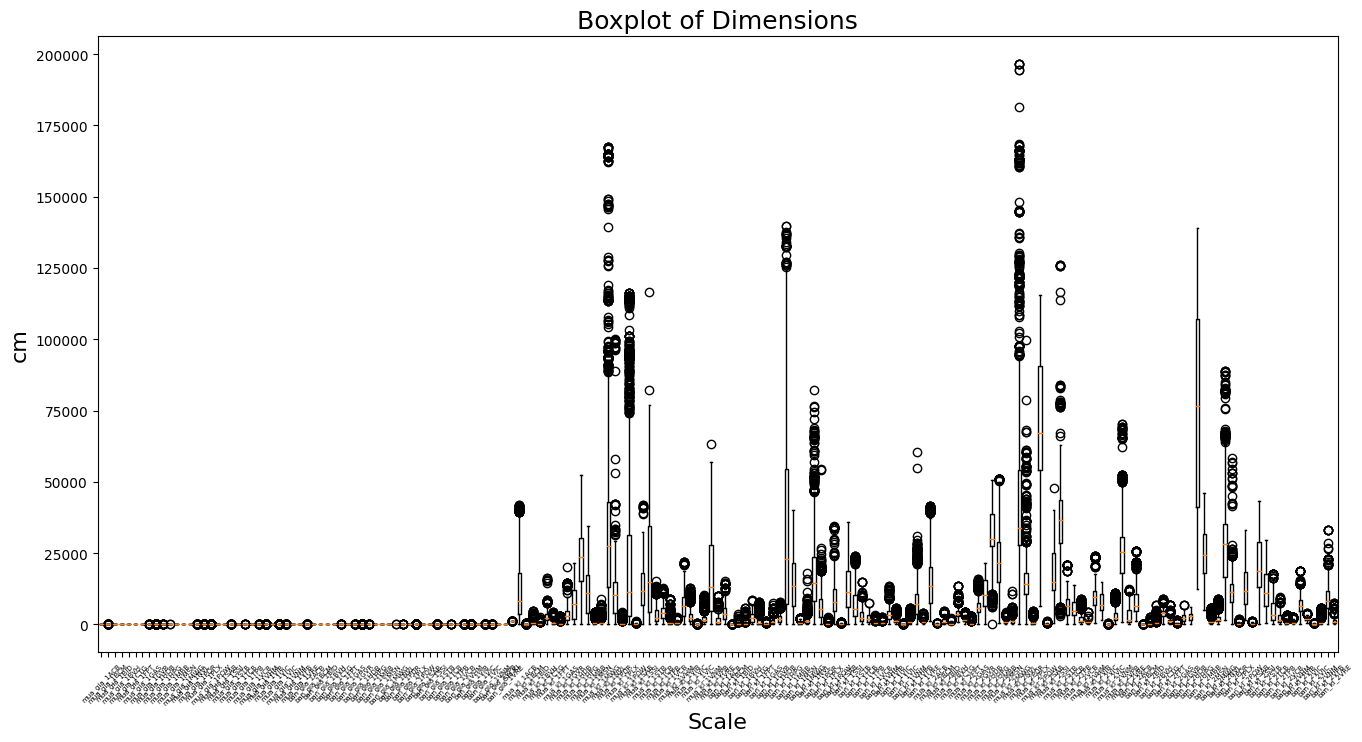

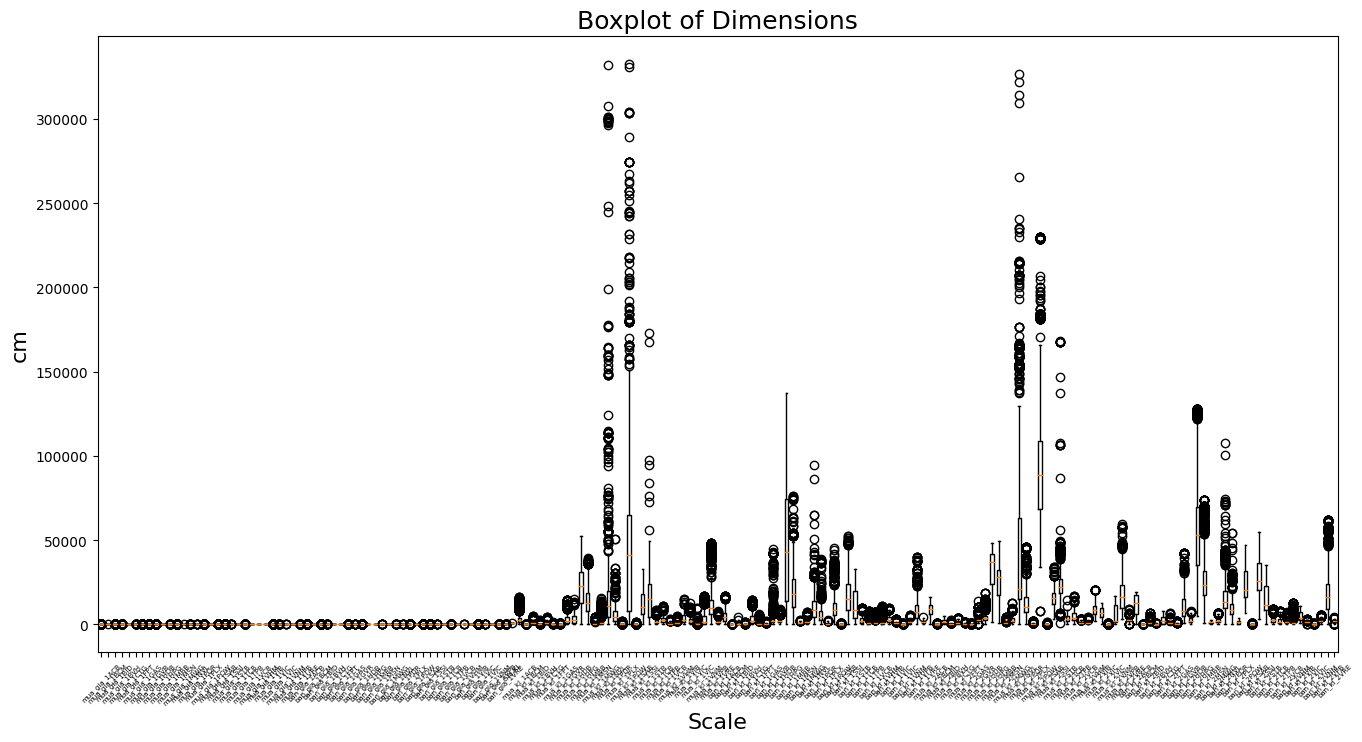

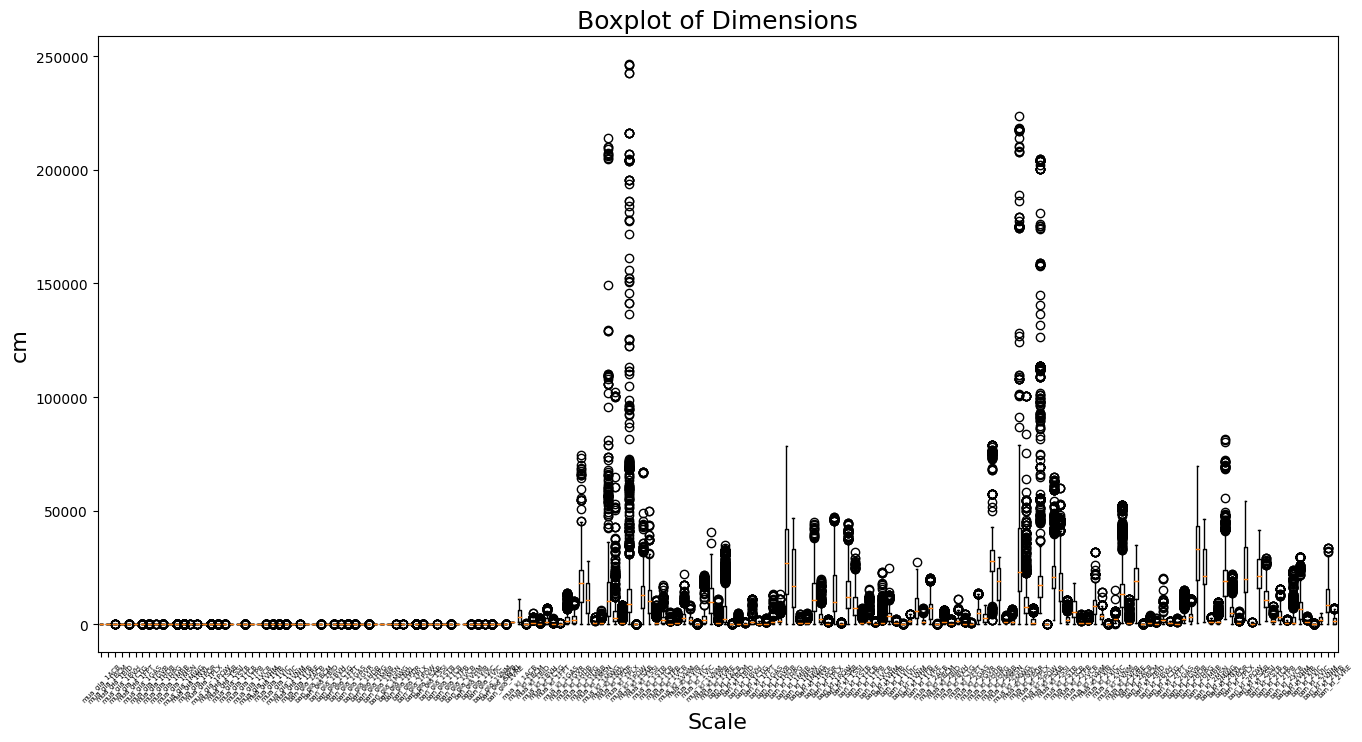

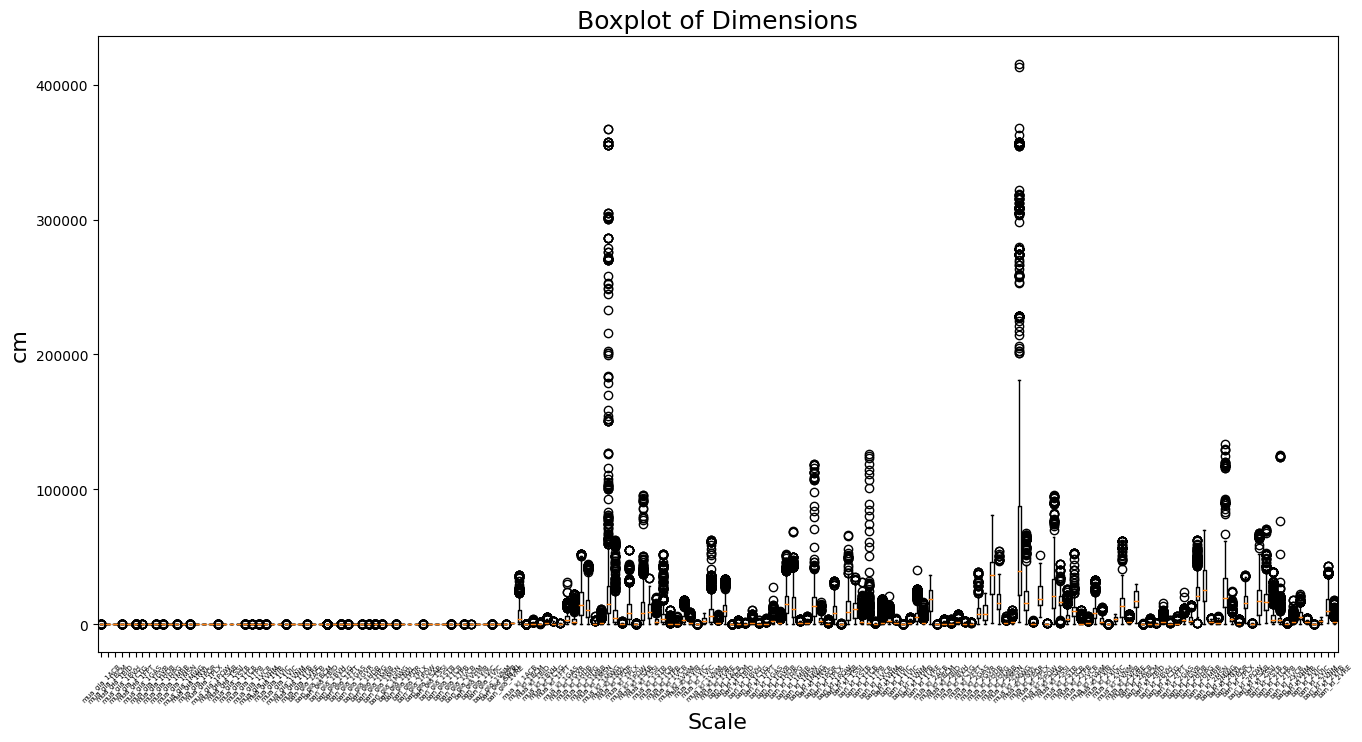

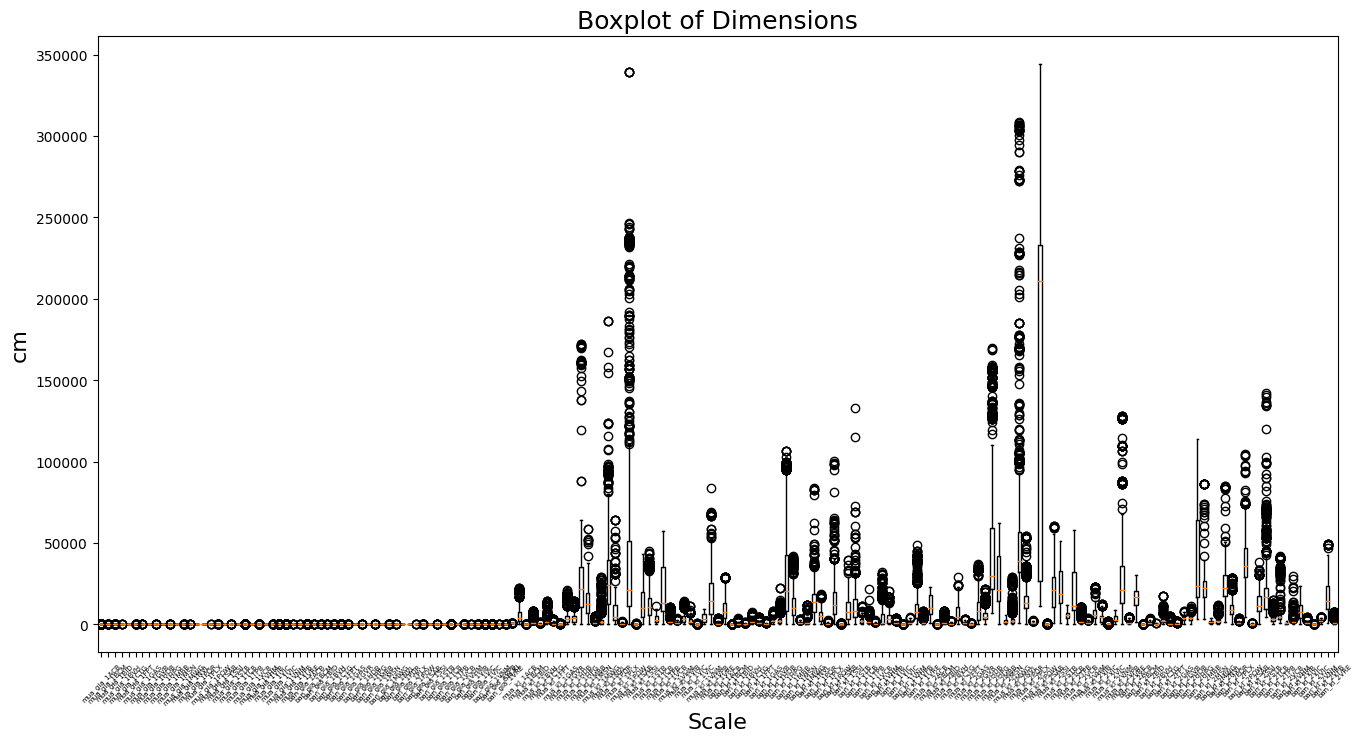

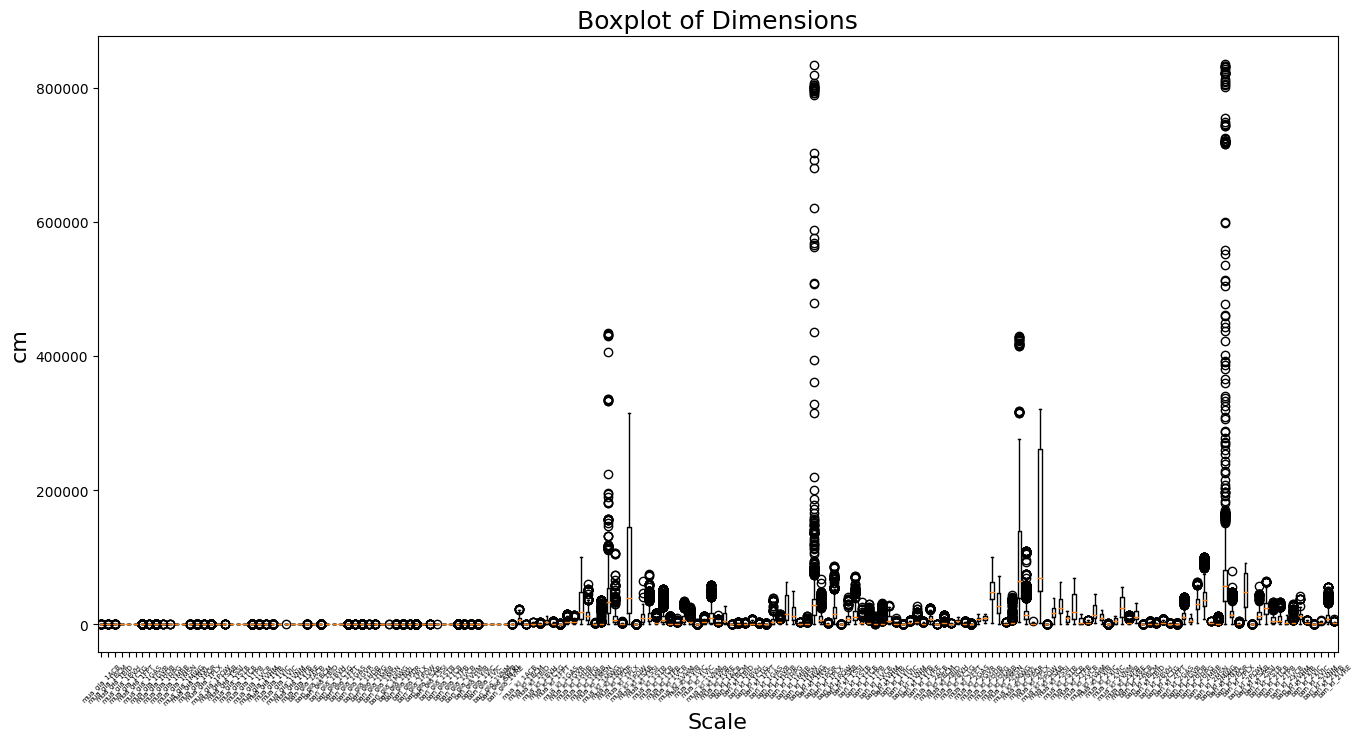

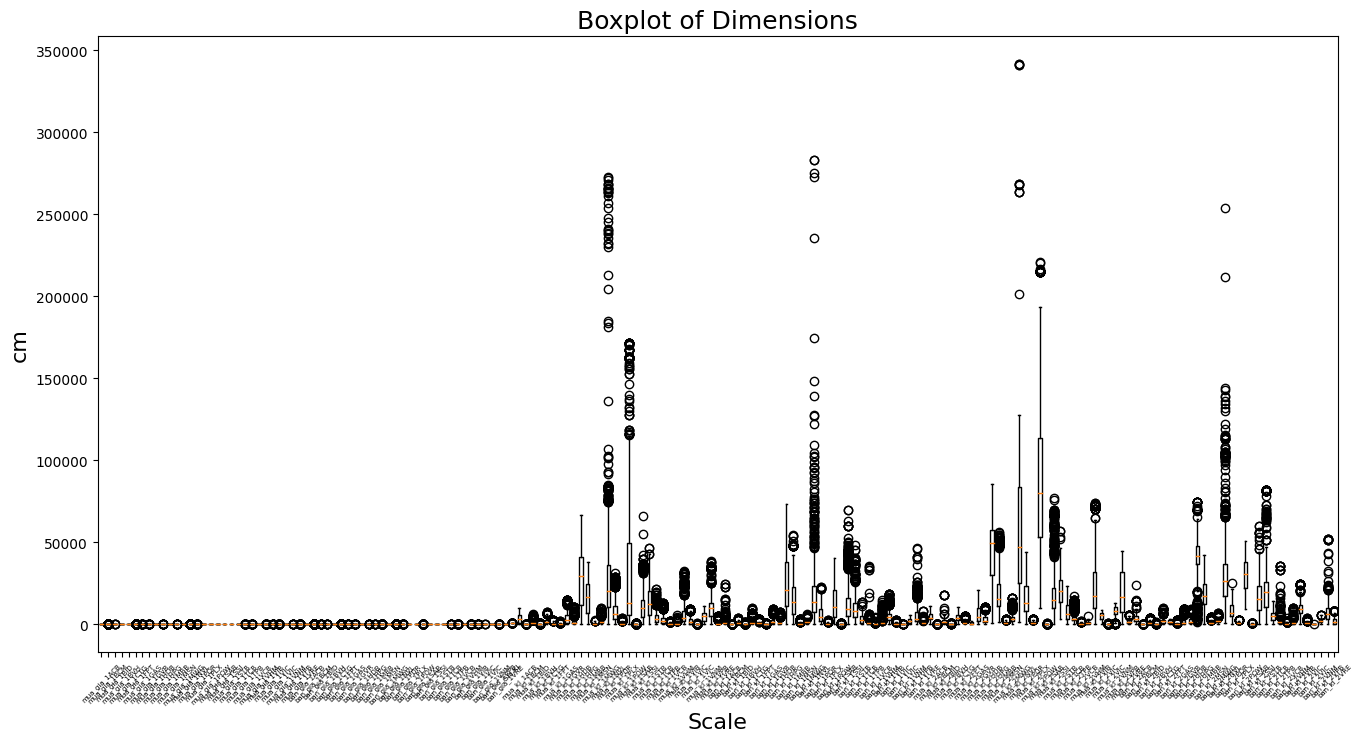

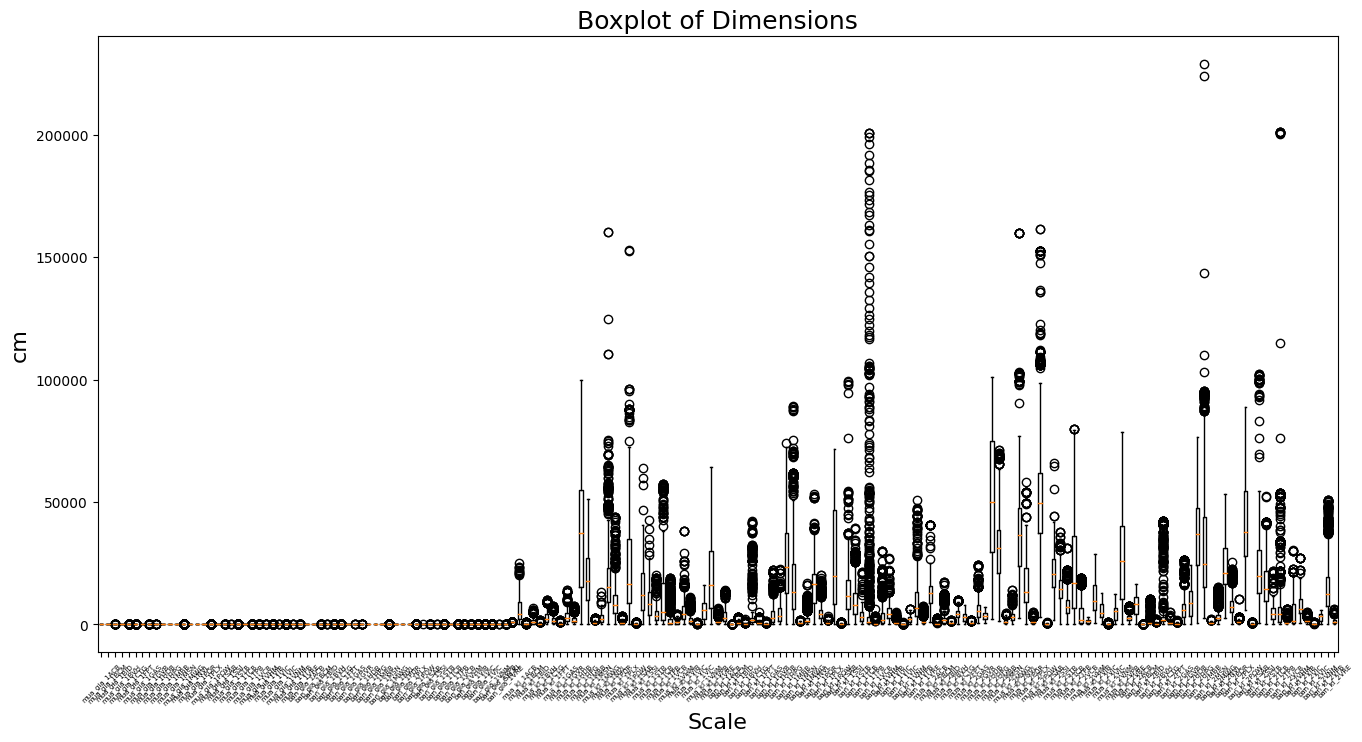

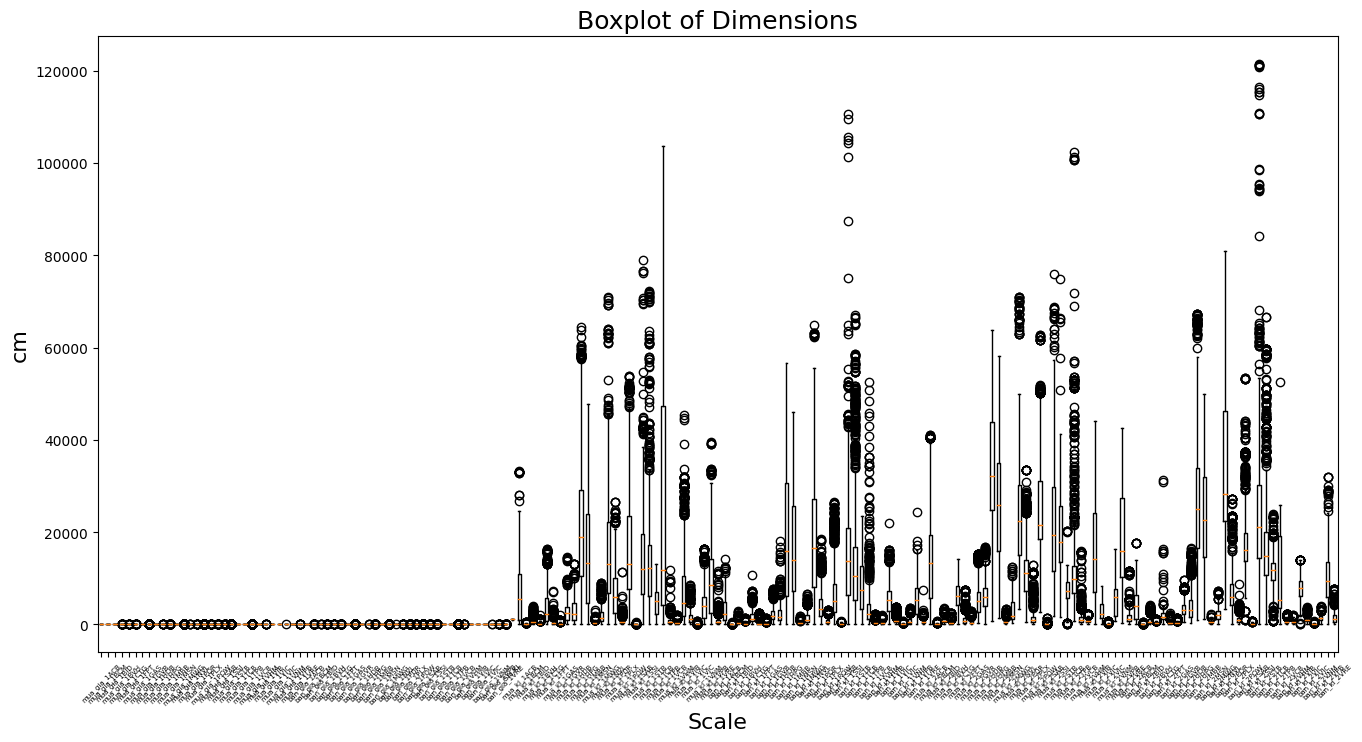

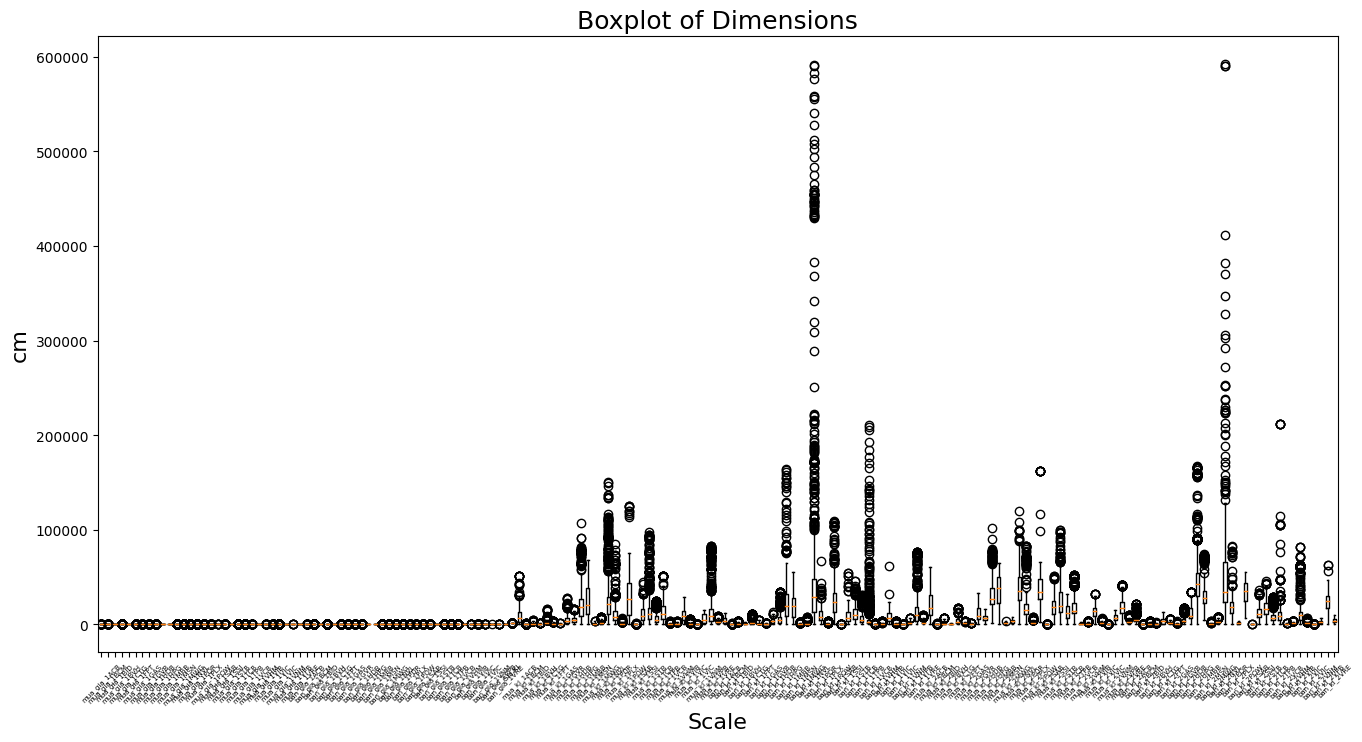

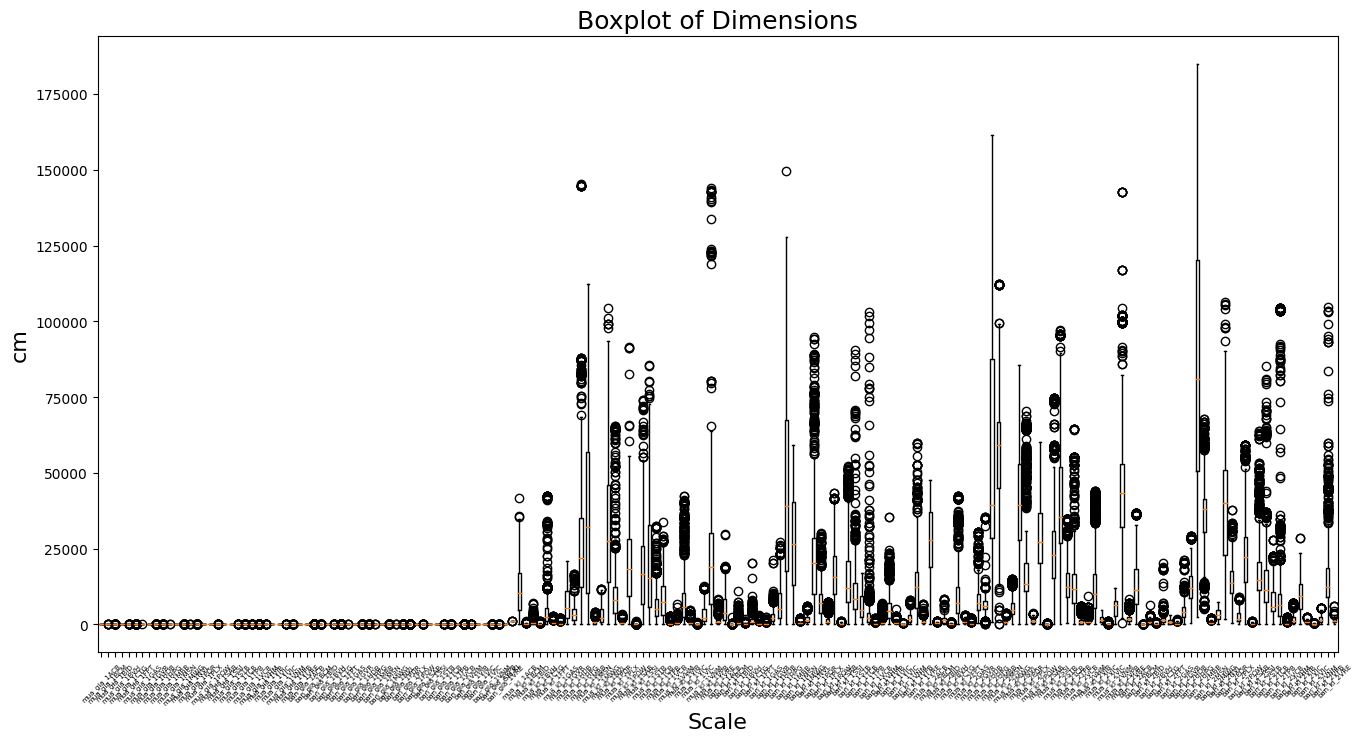

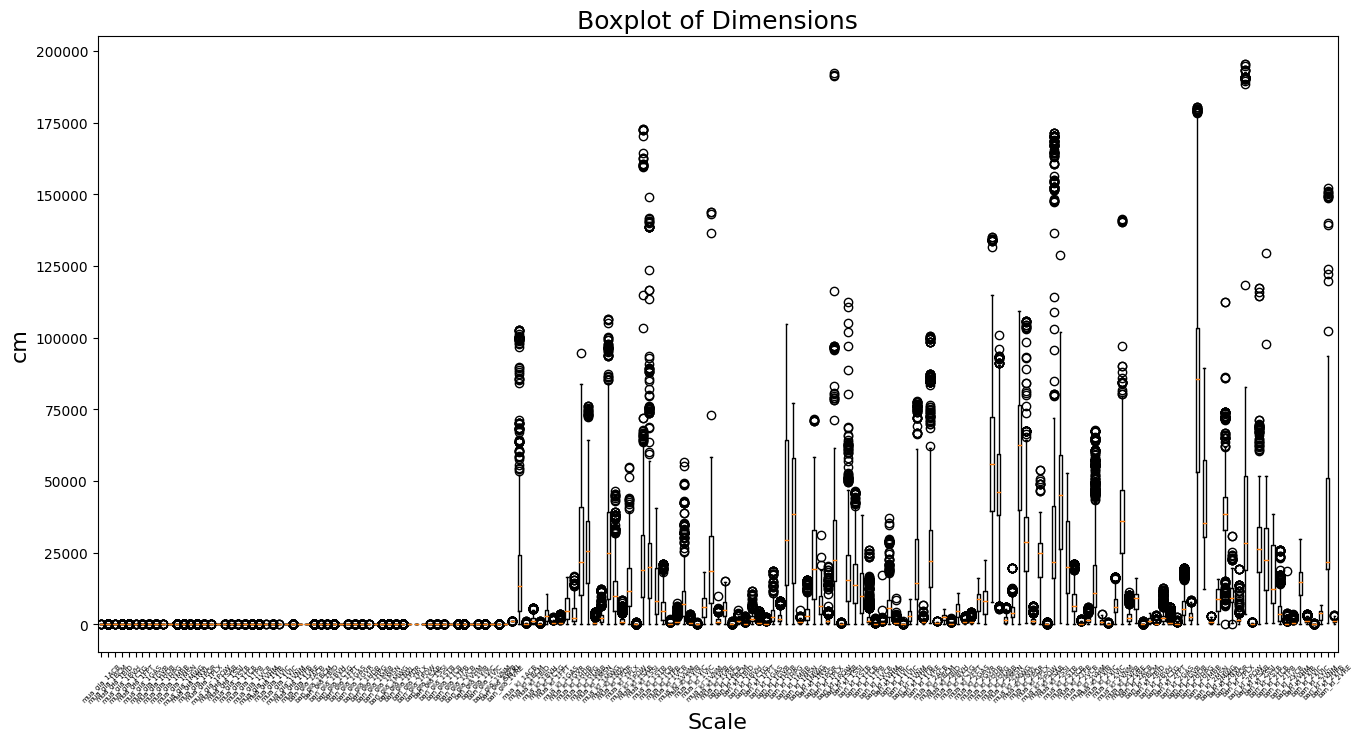

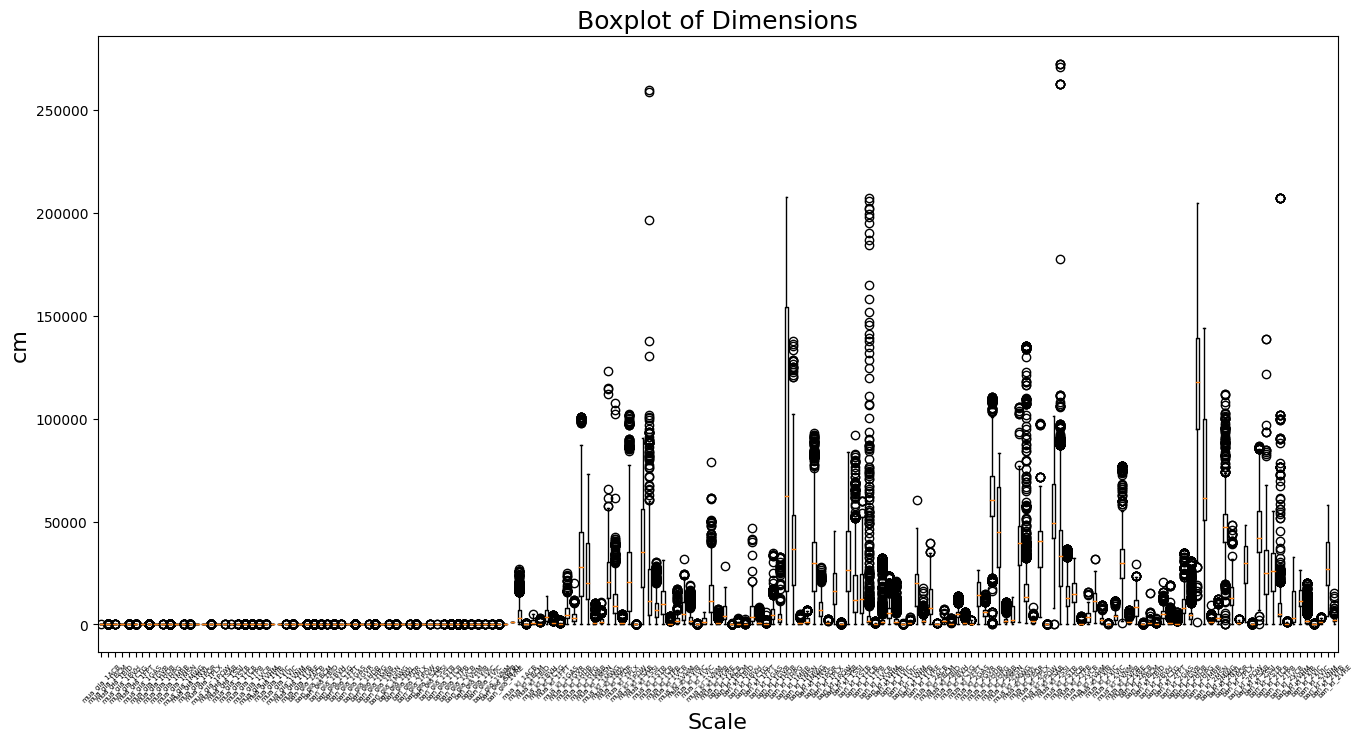

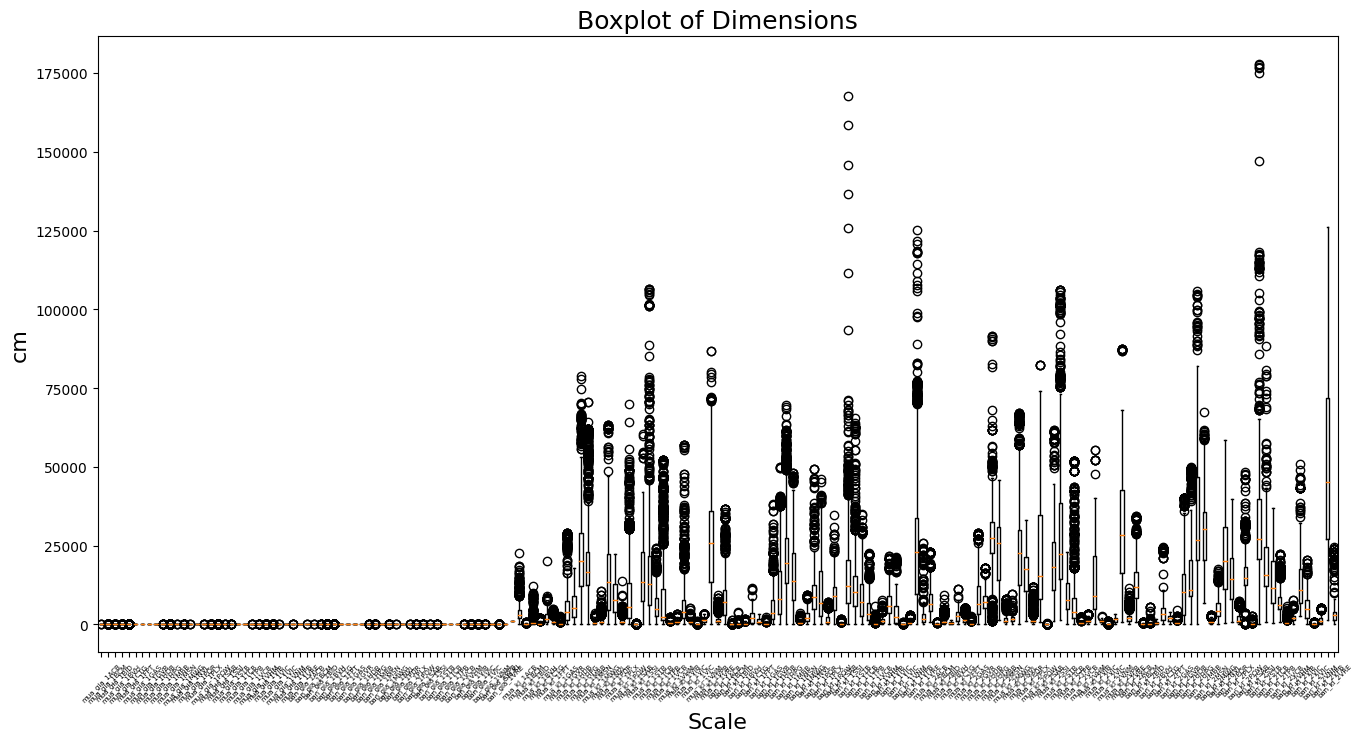

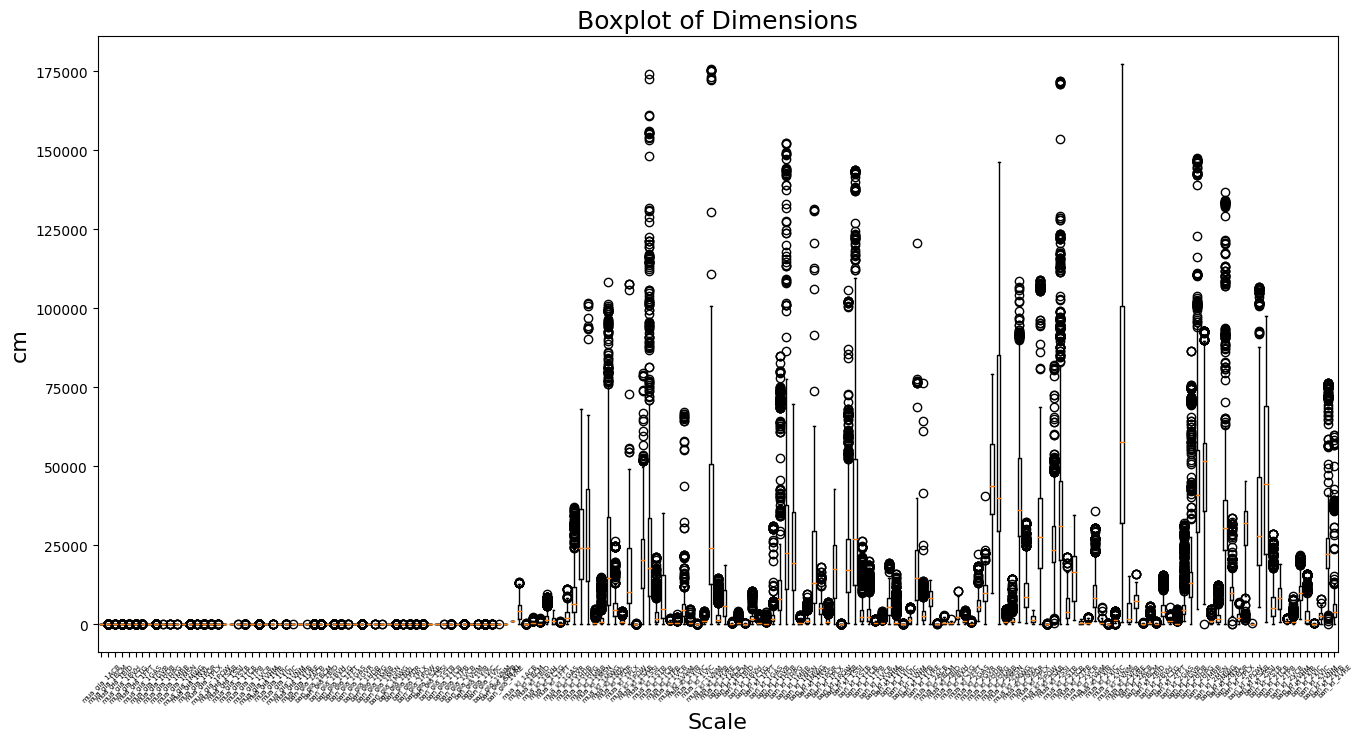

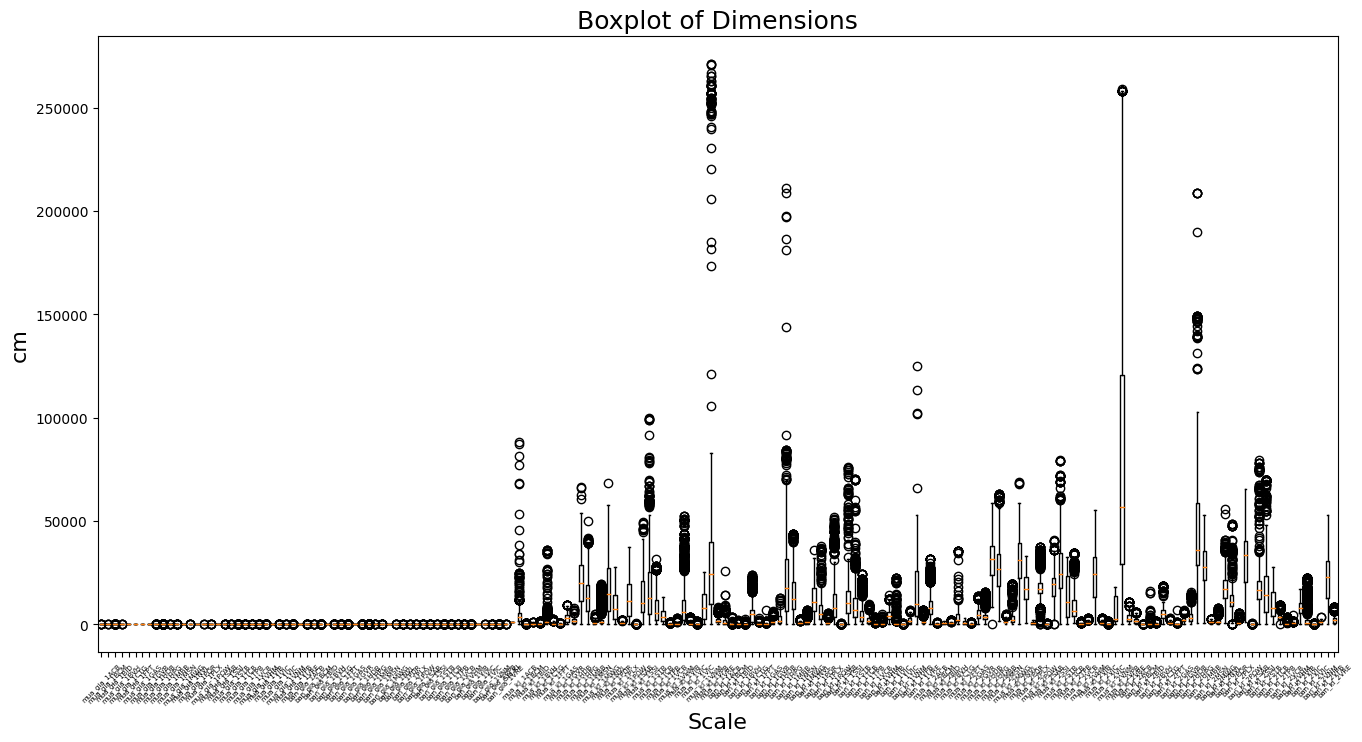

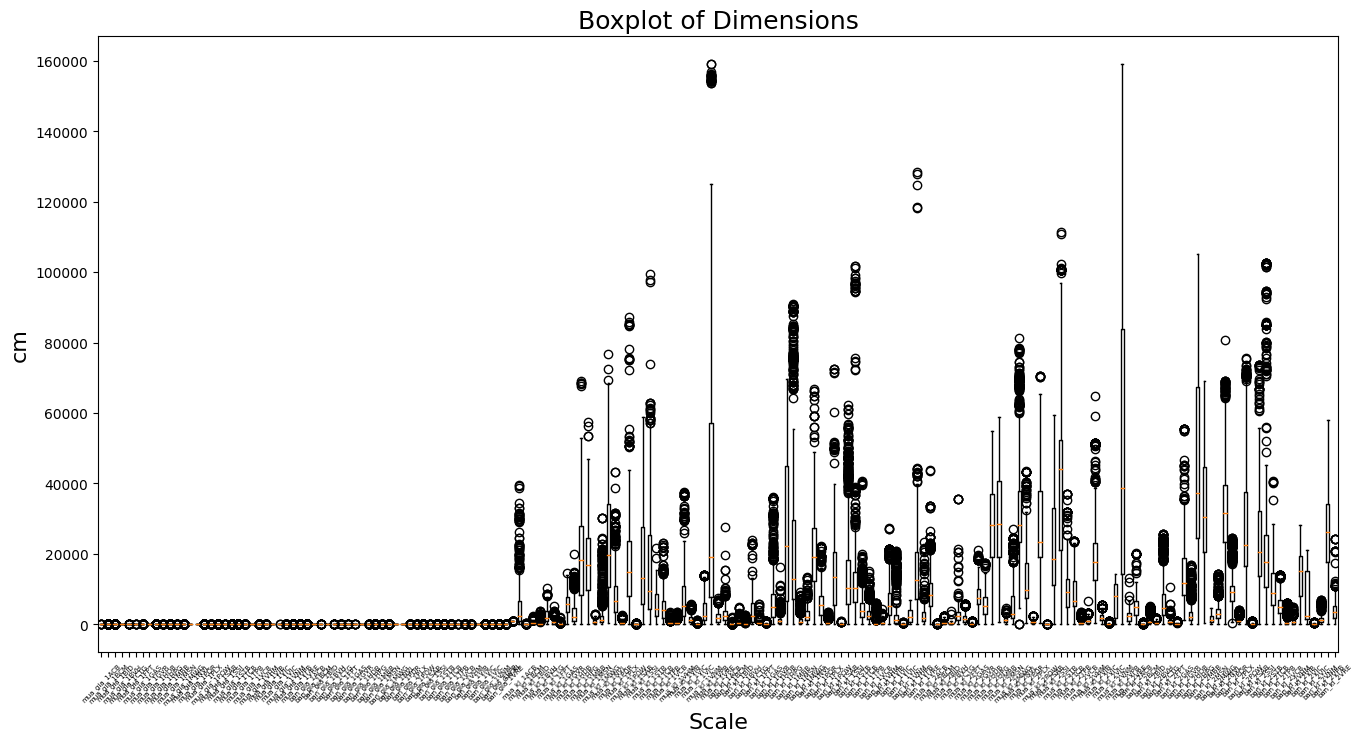

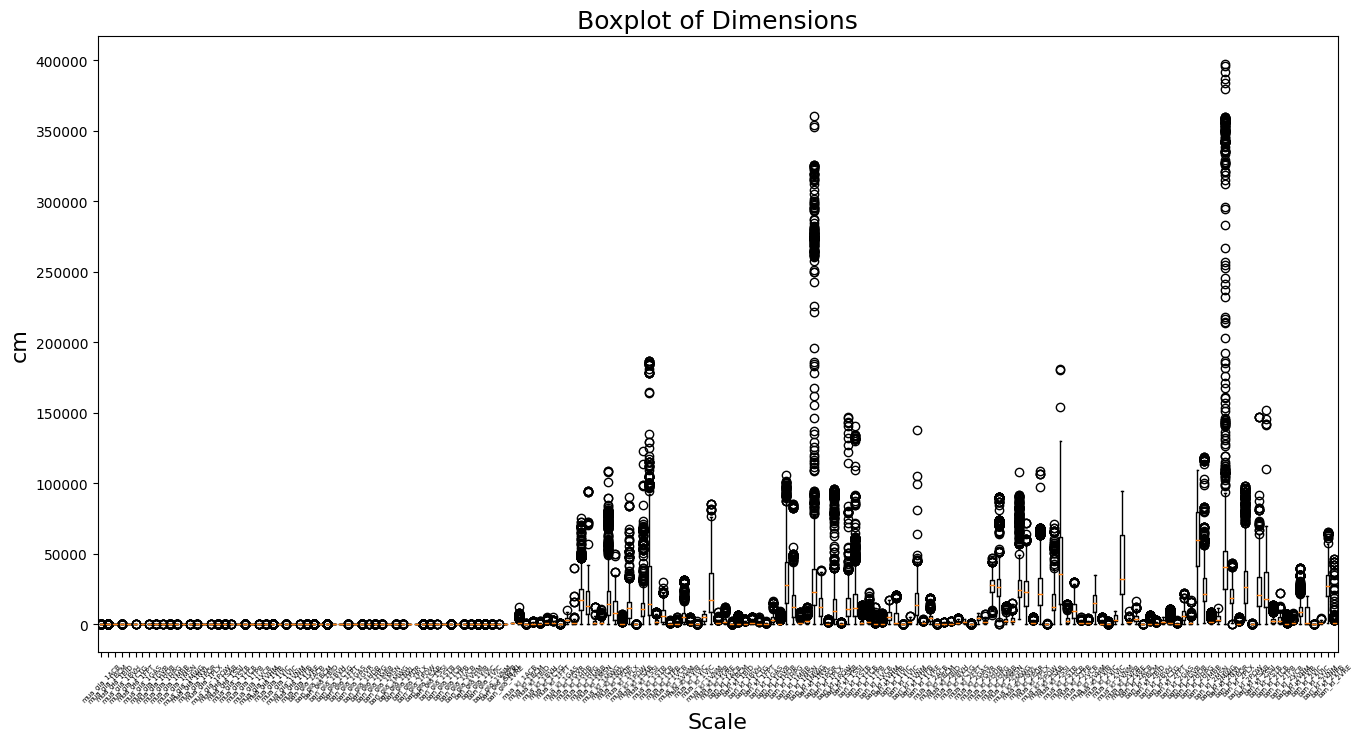

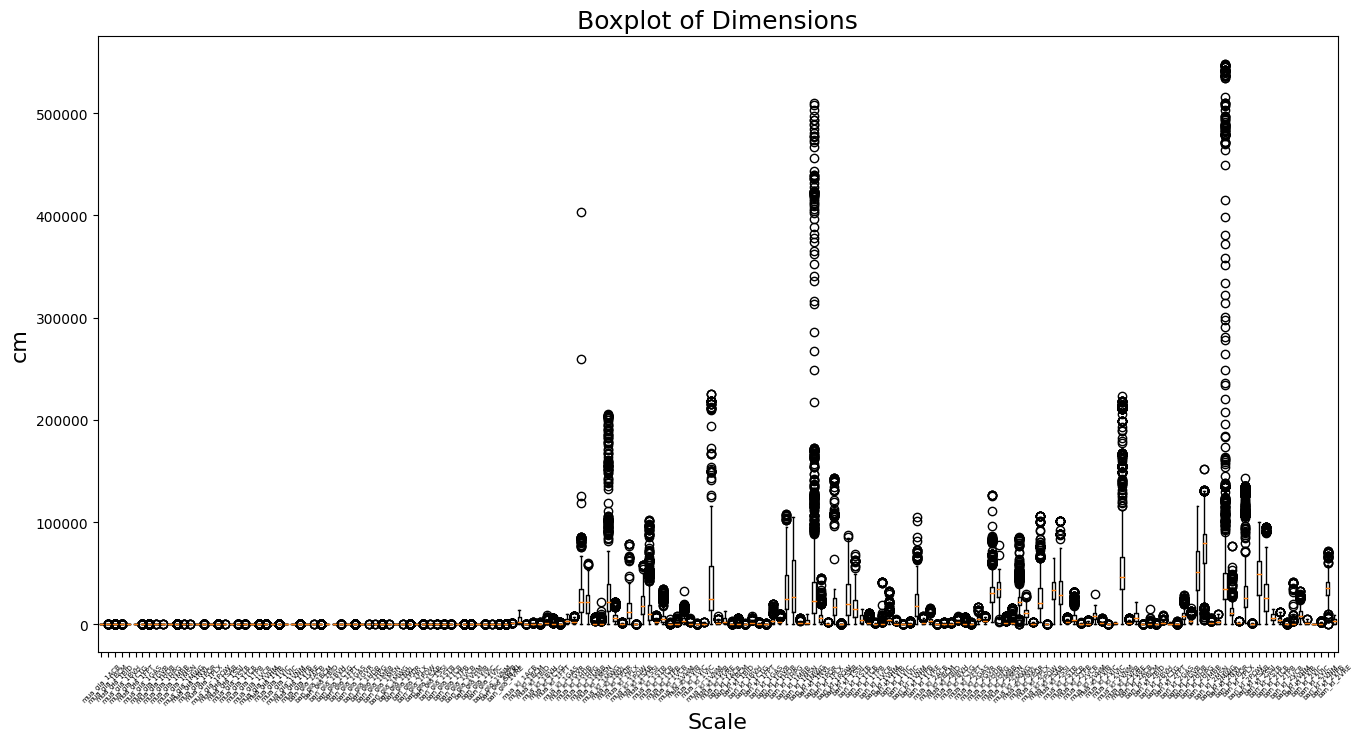

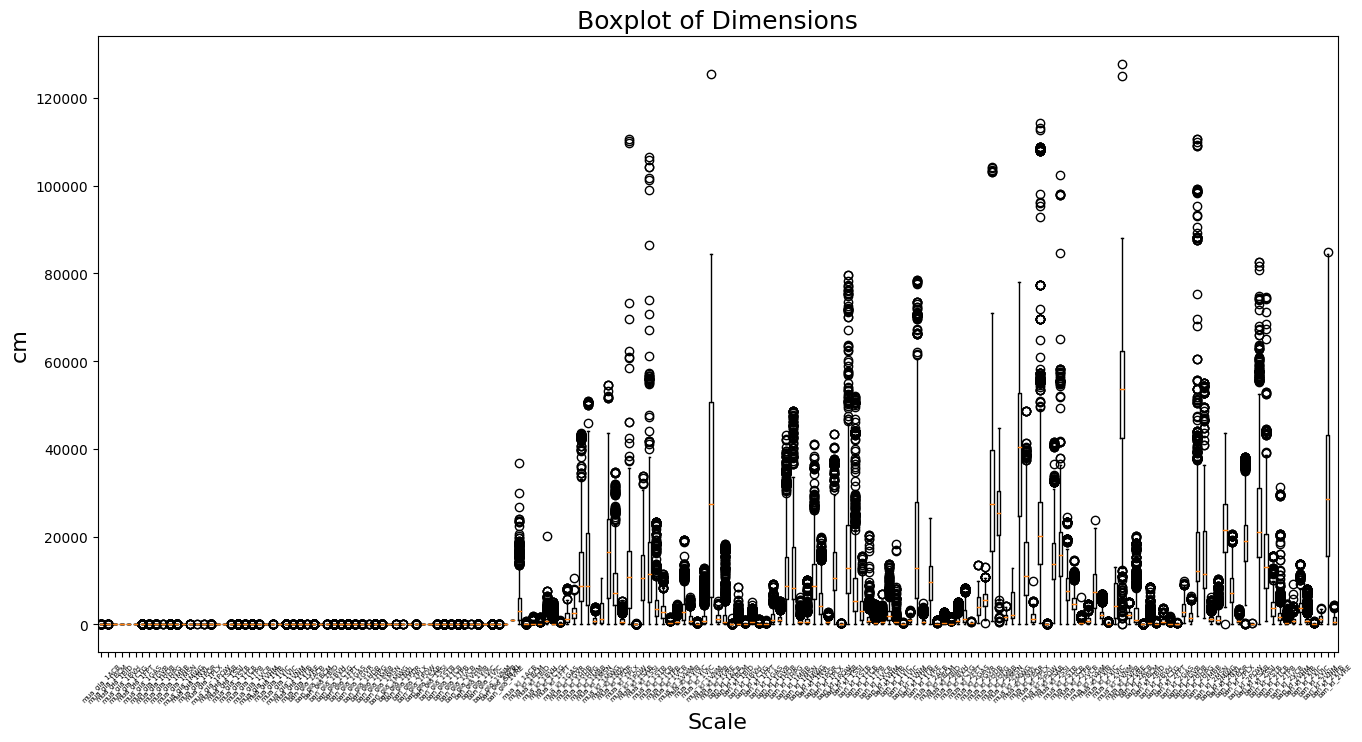

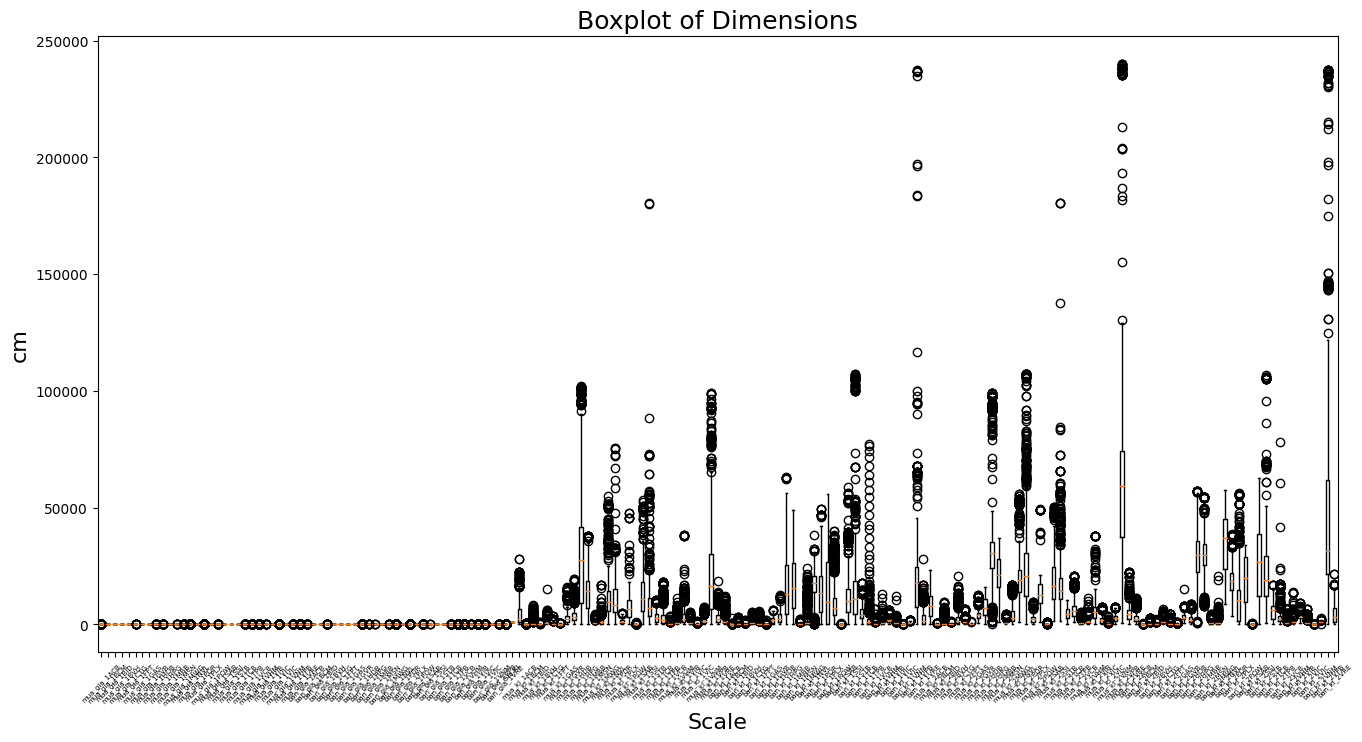

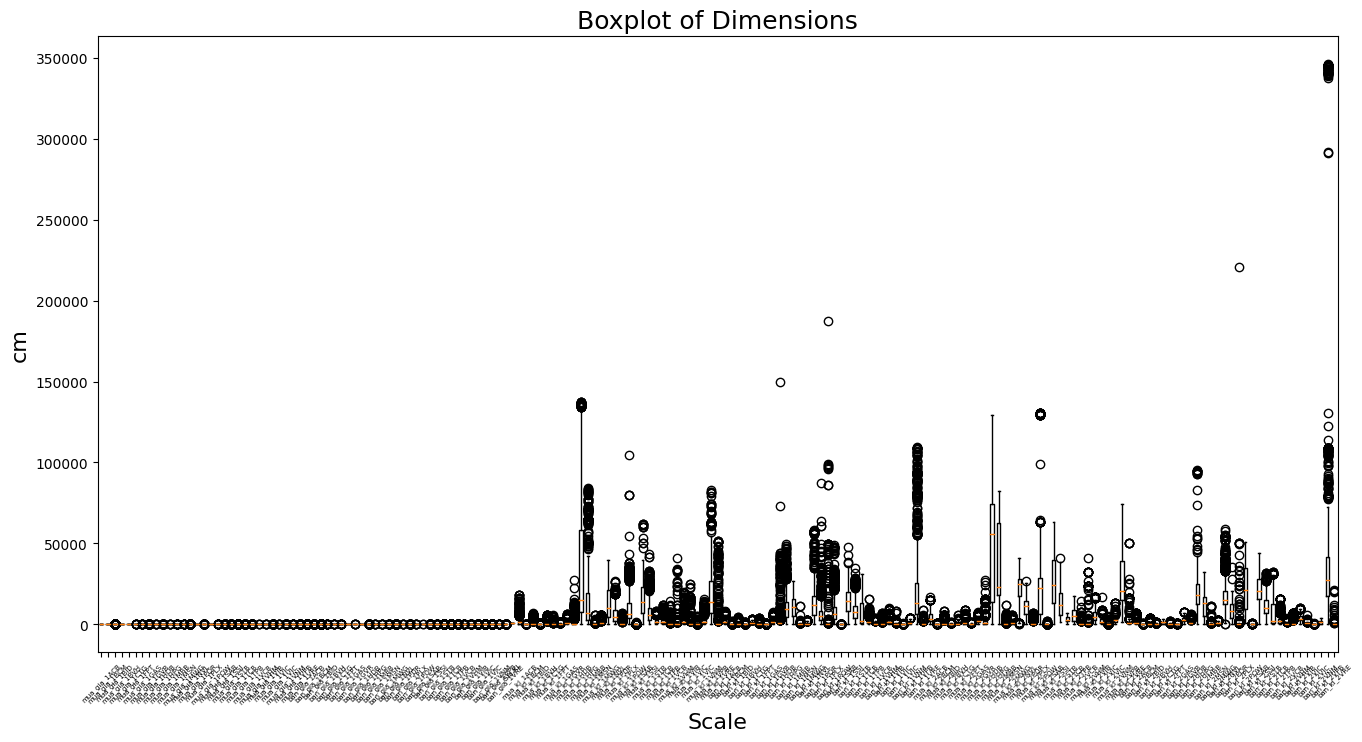

In [13]:
df = pd.read_pickle(new_pkl_path)
with PdfPages('fiugres/boxplot/boxplot.pdf') as pdf:
    for df_unit in df:
        dims = list(df_unit.columns)
        # Vẽ biểu đồ bboxplot
        plt.figure(figsize=(16, 8))
        plt.boxplot([df_unit[col] for col in dims])
        plt.xlabel('Scale', fontsize=16)
        plt.ylabel('cm', fontsize=16)
        plt.xticks(np.arange(len(dims))+1, dims, rotation=45, fontsize=5)
        plt.title("Boxplot of Dimensions", fontsize=18)
        pdf.savefig()
    plt.close()

# Correlation matrix

In [ ]:
features = index_table.values.remove('Gia KL')

# PCA

# Cluster